<a href="https://colab.research.google.com/github/nick18-ni/Aula-de-Visao-Computscional/blob/main/sobel_prewitt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install ipywidgets



Dropdown(description='Imagem:', options=('Madagascar.jpg', 'tigrão.jpg'), value='Madagascar.jpg')

RadioButtons(description='Filtro:', options=('Prewitt', 'Sobel'), value='Prewitt')

Imagem selecionado: tigrão.jpg
Filtro selecionado: Sobel


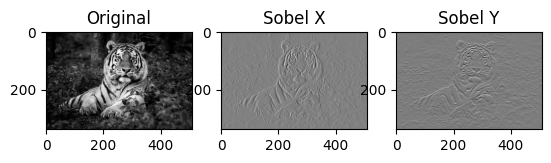

Filtro selecionado: Prewitt


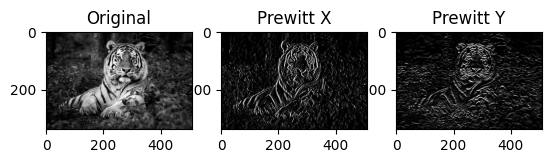

Imagem selecionado: Madagascar.jpg
Filtro selecionado: Sobel


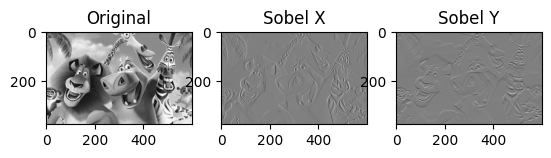

Filtro selecionado: Prewitt


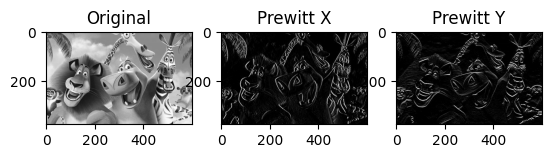

In [15]:
from google.colab.patches import cv2_imshow
import numpy as np
import cv2
from matplotlib import pyplot as plt
from ipywidgets import interact, IntSlider, RadioButtons, Dropdown


radio = RadioButtons(options=['Prewitt', 'Sobel'], description = 'Filtro:')
seletor = Dropdown(options=['Madagascar.jpg', 'tigrão.jpg'], description = 'Imagem:')

imagem = cv2.imread('Madagascar.jpg', cv2.IMREAD_GRAYSCALE)

def on_change_image(changeImage):
  global imagem;
  print(f'Imagem selecionado: {changeImage.new}')
  if changeImage.new == 'Madagascar.jpg':
    imagem = cv2.imread('Madagascar.jpg', cv2.IMREAD_GRAYSCALE)
  elif changeImage.new == 'tigrão.jpg':
    imagem = cv2.imread('tigrão.jpg', cv2.IMREAD_GRAYSCALE)

def on_change_filter(changeFilter):
    global imagem;
    print(f'Filtro selecionado: {changeFilter.new}')

    if changeFilter.new == 'Prewitt':
      prewitt_x = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
      prewitt_y = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])
      prewitt_x_result = cv2.filter2D(imagem, -1, prewitt_x)
      prewitt_y_result = cv2.filter2D(imagem, -1, prewitt_y)

      plt.subplot(1, 3, 1), plt.imshow(imagem, cmap='gray'), plt.title('Original')
      plt.subplot(1, 3, 2), plt.imshow(prewitt_x_result, cmap='gray'), plt.title('Prewitt X')
      plt.subplot(1, 3, 3), plt.imshow(prewitt_y_result, cmap='gray'), plt.title('Prewitt Y')
      plt.show()
    elif changeFilter.new == 'Sobel':
      sobel_x = cv2.Sobel(imagem, cv2.CV_64F, 1, 0, ksize= 3)
      sobel_y = cv2.Sobel(imagem, cv2.CV_64F, 0, 1, ksize= 3)
      sobel = cv2.magnitude(sobel_x, sobel_y)
      plt.subplot(1, 3, 1), plt.imshow(imagem, cmap='gray'), plt.title('Original')
      plt.subplot(1, 3, 2), plt.imshow(sobel_x, cmap='gray'), plt.title('Sobel X')
      plt.subplot(1, 3, 3), plt.imshow(sobel_y, cmap='gray'), plt.title('Sobel Y')
      plt.show()
seletor.observe(on_change_image, names='value')
display(seletor)

radio.observe(on_change_filter, names='value')
display(radio)